In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from pydataset import data

import acquire
import env

from scipy import stats
import math


# Project Objectives
The Code up Date Science team has been assigned to find out what causes customers to churn and how can we predict if a customer is about to churn



# Agenda

### Data dictionary / Acquisition
### Preparation 
### Exploration
### Statistical analysis
### Modeling 
### Prediction 
### Conclusion

In [2]:
telco_df = acquire.get_telco_data()
train, validate, test = acquire.prep_telco_data(telco_df)


## Data Dictionary/ Acquisition

1. The data is acquired from the Codeup sql database where specific credentials are neccessary to access it. 
2. After the data acquisition, the next process was tofigure out any unneccesary/ redundant columns and drop them.


Acquiring the data using the get_telco_data finction

In [81]:
telco_df = acquire.get_telco_data()
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


#### columns available in the telco_df data set

In [4]:
telco_df.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

#### prepared and cleaned data set

#### available columns on the train dataset

In [6]:
train.columns

Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'gender_Male', 'partner_Yes', 'dependents_Yes', 'multiple_lines_Yes',
       'online_security_Yes', 'online_backup_Yes', 'device_protection_Yes',
       'tech_support_Yes', 'churn_Yes', 'streaming_tv_Yes',
       'streaming_movies_Yes', 'paperless_billing_Yes',
       'contract_type_One_year', 'contract_type_Two_year',
       'internet_service_type_Fiber_optic', 'internet_service_type_None',
       'payment_type_Credit_card_(automatic)', 'payment_type_Electronic_check',
       'payment_type_Mailed_check'],
      dtype='object')

## Preparation

1. Transformed the total_charges column from a string to an integer for workability purposes.
2. Discovered nulls in the total_charges column where I opted to drop them since they are less than 1% of the dataset
3. Columns to be encoded into boolean values. "Yes" = 1, "No/No internet service" = 0. (online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies) 
4. Cleaned up some of the columns that had spaces and replaced them with an underscore
5. Dropped all the columns that contained id. ('payment_type_id', 'internet_service_type_id','contract_type_id','customer_id','phone_service'). 
6. Lastly, used get dummies on on boolean columns to ensure ML model capability
7. split the data to Train, validate and test
8. All the necessary functions are available on the acquire.py file

Cleaning the telco exploration data

In [12]:
telco_df = telco_df[telco_df.total_charges!=" "]
telco_df["total_charges"] = pd.to_numeric(telco_df.total_charges)


## Data Exploration

### Univariate Analysis


#### Observing the churn rate of different tenure
it appears that customers of 10 months and under have a high churn rate

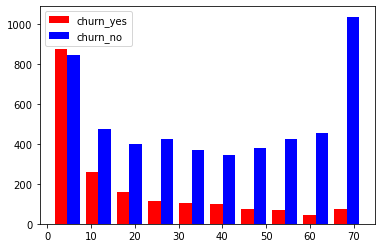

In [14]:
tenure_not_churn = telco_df[telco_df.churn == "No"].tenure
tenure_churn = telco_df[telco_df.churn == "Yes"].tenure


# plt.ylabel("$customers$")
# plt.xlabel ("$telco_df.tenure$")
# plt.title ("Tenure and Churned Customers")
plt.hist([tenure_churn, tenure_not_churn], 
          color = ["red", "blue"], 
          label = ["churn_yes", "churn_no"]) 
plt.legend()


#### Observing the churn rate of different monthly charges
it appears that customers that pay 70 ~ 110 have a higher churn rate


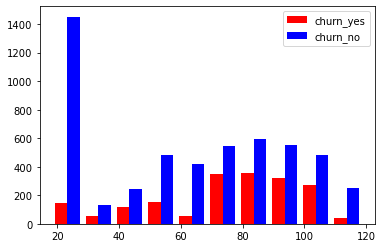

In [15]:
mc_not_churn = telco_df[telco_df.churn == "No"].monthly_charges
mc_churn = telco_df[telco_df.churn == "Yes"].monthly_charges


# plt.ylabel("$customers$")
# plt.xlabel ("$telco_df.tenure$")
# plt.title ("Tenure and Churned Customers")
plt.hist([mc_churn, mc_not_churn], 
          color = ["red", "blue"], 
          label = ["churn_yes", "churn_no"]) 
plt.legend()


#### Observing the churn rate of different payment types

It appears that payment_type_id 1 (which represents electronic check payment) appears to have the highest churn rate among payment methods

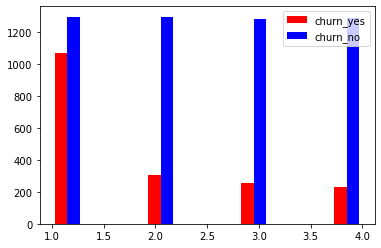

In [16]:
payment_type_id_not_churn = telco_df[telco_df.churn == "No"].payment_type_id
payment_type_id_churn = telco_df[telco_df.churn == "Yes"].payment_type_id


# plt.ylabel("$customers$")
# plt.xlabel ("$telco_df.tenure$")
# plt.title ("Tenure and Churned Customers")
plt.hist([payment_type_id_churn, payment_type_id_not_churn], 
          color = ["red", "blue"], 
          label = ["churn_yes", "churn_no"]) 
plt.legend()


#### Observing the churn rate of different internet service type
It appears that Fiber optic churn customers churn the most in this category

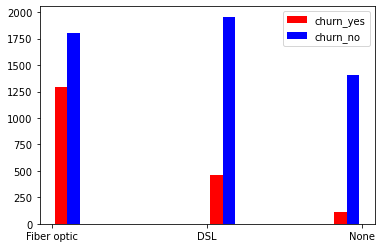

In [17]:
is_not_churn = telco_df[telco_df.churn == "No"].internet_service_type
is_churn = telco_df[telco_df.churn == "Yes"].internet_service_type


# plt.ylabel("$customers$")
# plt.xlabel ("$telco_df.tenure$")
# plt.title ("Tenure and Churned Customers")
plt.hist([is_churn, is_not_churn], 
          color = ["red", "blue"], 
          label = ["churn_yes", "churn_no"]) 
plt.legend()

### Bivariate Analysis


clear the customer_id column

In [18]:
columns_dropped = ["customer_id"]
telco_df = telco_df.drop(columns = columns_dropped)

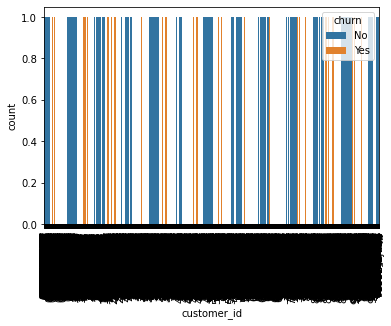

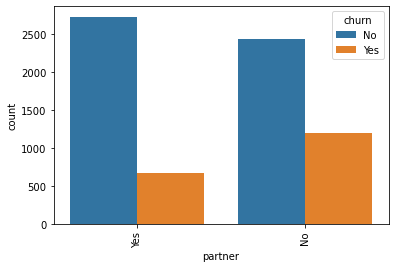

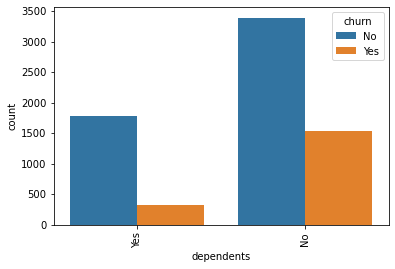

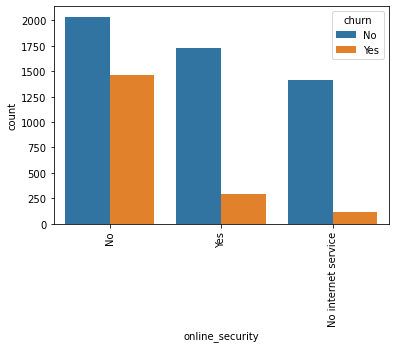

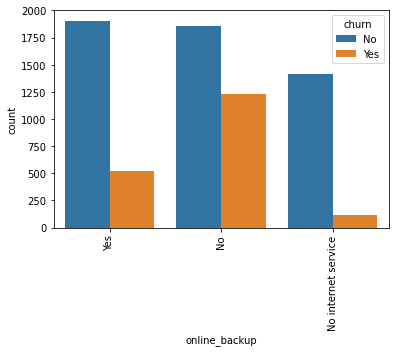

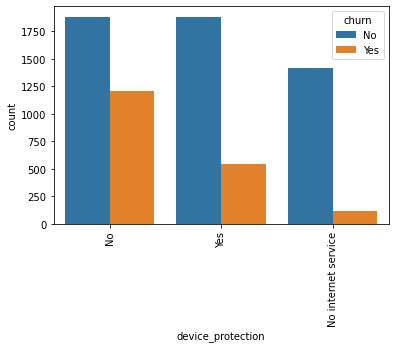

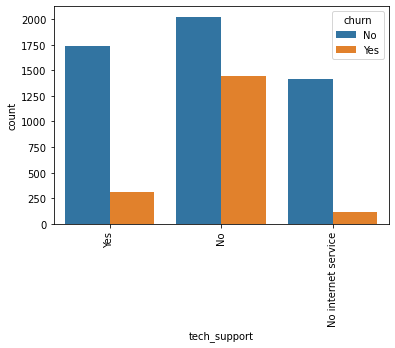

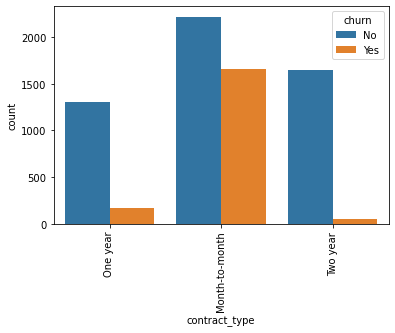

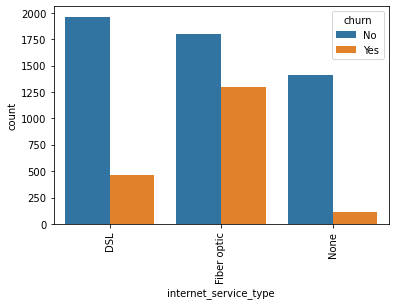

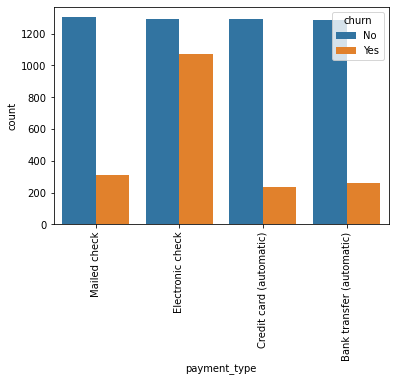

In [85]:
for i, predictor in enumerate(telco_df.drop(columns=['senior_citizen','paperless_billing','churn','tenure', 'gender','total_charges', 'monthly_charges','contract_type_id','payment_type_id', 'internet_service_type_id','contract_type_id','phone_service','streaming_movies','streaming_tv','multiple_lines'])):
    plt.figure(i)
    plot= sns.countplot(data=telco_df, x=predictor, hue='churn')
    plt.setp(plot.get_xticklabels(), rotation=90)    



### Takeaways
- It appears that customers with no partners and no dependents have a high churn rate
- Customers with no online backup, no online security, no device protection, and no tech support have a higher probability of churning than those who do
- month to month contract type, fiber optic internet service and electronic check paypent also have a high probability of churning

checking statistical features on specific variables 

In [20]:
temp_df = telco_df.drop(columns=['senior_citizen','contract_type_id','payment_type_id', 'internet_service_type_id','contract_type_id','phone_service','streaming_movies','streaming_tv','multiple_lines'])
temp_df.describe().T


,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
total_charges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


### Hypothesis testing   
    


Columns_of_interest:

    - monthly_charges
    - total_charges
    - tenure
    - partner 
    - dependents
    - multiple_lines                      
    - online_security                      
    - online_backup                     
    - device_protection                    
    - tech_support
    - contract_type
    - internet_service_type
    - payment_type

In [22]:
alpha = 0.05

### I used pearsons R for linear relationship/ correlation

### customers with total_charges
Initial Hypotheses

$H_{0}$  : Rate of churn is not dependent on having high total charges with the company

$H_{1}$  : Rate of churn is dependent on having high total charges with the company

### customers with tenure
Initial Hypotheses

$H_{0}$  : Rate of churn is not dependent on having tenure with the company

$H_{1}$  : Rate of churn is dependent on having tenure with the company

##### for the categorical variables I used Chi2

### customers with partners
Initial Hypotheses

$H_{0}$  : Rate of churn is not dependent on having a partner

$H_{1}$  : Rate of churn is dependent on having a partner
     

In [26]:
partners_crosstab = pd.crosstab(train.partner_Yes, train.churn_Yes)
partners_crosstab

churn_Yes,0,1
partner_Yes,,
0,1364,663
1,1527,383


### customers with dependents
Initial Hypotheses

$H_{0}$  : Rate of churn is not dependent on having dependents

$H_{1}$  : Rate of churn is dependent on having dependents

### customers with multiple_lines
Initial Hypotheses

$H_{0}$  : Rate of churn is not dependent on having multiple_lines 

$H_{1}$  : Rate of churn is dependent on having multiple_lines

### customers with online_security
Initial Hypotheses

$H_{0}$  : Rate of churn is not dependent on having online_security

$H_{1}$  : Rate of churn is dependent on having online_security

### customers with online_backup
Initial Hypotheses

$H_{0}$  : Rate of churn is not dependent on having online_backup

$H_{1}$  : Rate of churn is dependent on having online_backup

### customers with device_protection
Initial Hypotheses

$H_{0}$  : Rate of churn is not dependent on having device_protection

$H_{1}$  : Rate of churn is dependent on having device_protection

### customers with tech_support
Initial Hypotheses

$H_{0}$  : Rate of churn is not dependent on having tech_support

$H_{1}$  : Rate of churn is dependent on having tech_support


### customers with certain contract_type
Initial Hypotheses

$H_{0}$  : Rate of churn is not dependent on the contract_type

$H_{1}$  : Rate of churn is dependent on the contract_type




### customers with certain internet_service_type
Initial Hypotheses

$H_{0}$  : Rate of churn is not dependent on the internet_service_type

$H_{1}$  : Rate of churn is dependent on the internet_service_type

### customers with certain payment_type
Initial Hypotheses

$H_{0}$  : Rate of churn is not dependent on the payment_type

$H_{1}$  : Rate of churn is dependent on the payment_type




In [86]:
# p_value_df.to_csv('p_value.csv') # add `, index = False` to leave off index


# Feature Modeling

The above dataframe shows features that have rejected the null hypothesis 

The features have a significant churn rate in comparison to the other features tested.

possible outcomes to the model

TP: the model predicts that a customer will churn and they do

TN: the model predicts that a customer will not and they don't

FP: the model predicts that a customer will churn but they don't

FN: the model predicts that a customer will not churn but they do


Correlation Visualization

<AxesSubplot:>

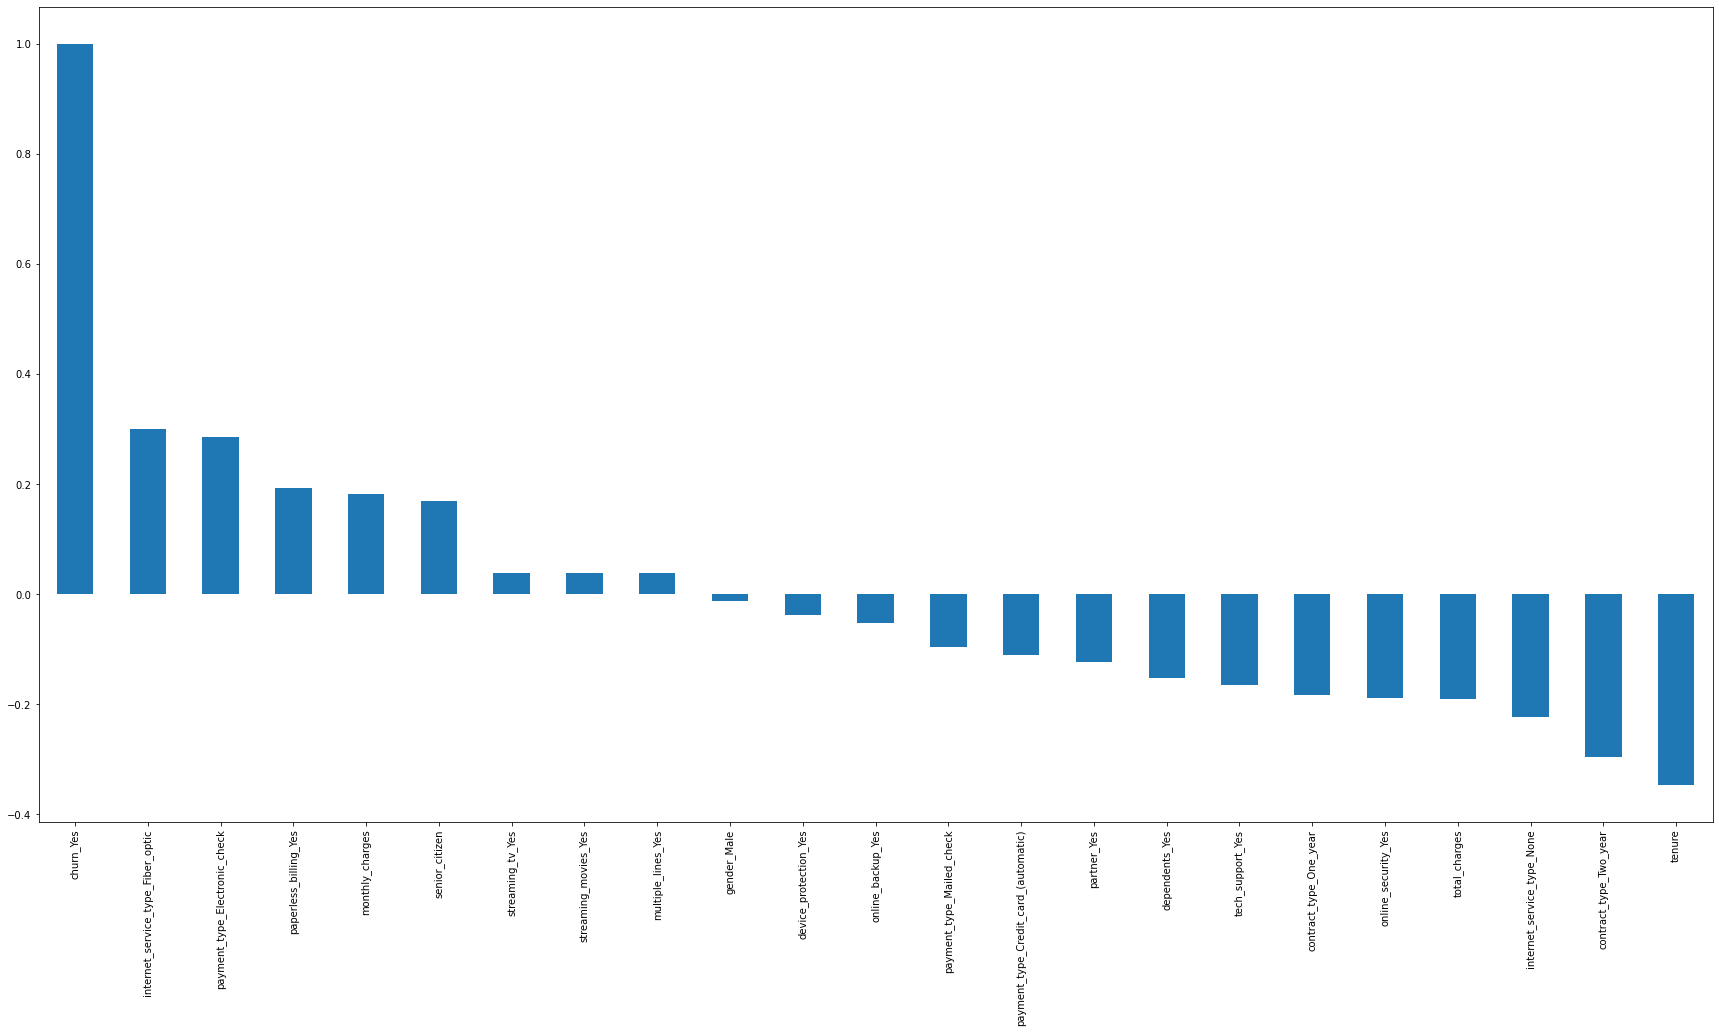

In [87]:
plt.figure(figsize=(30,15))
train.corr()['churn_Yes'].sort_values(ascending = False).plot(kind='bar')

evaluation of the current train data set

In [39]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in the telco df, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [40]:
train, validate, test = train_validate_test_split(train, target = "churn_Yes", seed =123)

X_train = train.drop(columns = ["churn_Yes"])
y_train = train.churn_Yes

X_validate = validate.drop(columns = ["churn_Yes"])
y_validate = validate.churn_Yes

X_test = test.drop(columns = ["churn_Yes"])
y_test = test.churn_Yes

### Baseline

In [88]:
import statistics
# The mode is a great baseline
baseline = y_train.mode()


# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")
baseline

Baseline accuracy: 0.73


0    0
dtype: uint8

#### Testing out a model to decide whether to upsample the train Data set

In [42]:
rf = RandomForestClassifier(max_depth=5, 
                            random_state=123)

In [43]:
rf = rf.fit(X_train, y_train)


In [44]:
print(rf.feature_importances_)

[0.01568469 0.19549115 0.10100166 0.15323788 0.00483675 0.00682344
 0.00837724 0.00626257 0.04292528 0.00868162 0.00424327 0.03022029
 0.00426796 0.00558952 0.02118279 0.05259975 0.07551062 0.14690008
 0.05127899 0.00462323 0.05183899 0.00842222]


In [45]:
y_pred = rf.predict(X_train)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [46]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.97074225, 0.02925775],
       [0.38152763, 0.61847237],
       [0.77382148, 0.22617852],
       [0.32960794, 0.67039206],
       [0.80497124, 0.19502876]])

In [47]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[0.97074225, 0.02925775],
       [0.38152763, 0.61847237],
       [0.77382148, 0.22617852],
       ...,
       [0.94795694, 0.05204306],
       [0.9524698 , 0.0475302 ],
       [0.78839179, 0.21160821]])

In [48]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.81


In [49]:
y_pred = rf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.93      0.88       694
           1       0.72      0.48      0.58       251

    accuracy                           0.81       945
   macro avg       0.78      0.71      0.73       945
weighted avg       0.80      0.81      0.80       945



as shown above the model F1 score for the churners(yes) is .53

this prompts for an upsample for the training data set

## New Train Dataset 

I realize that there might be an issue of imbalanced data with a ratio of = 0.73: 0.27 on the train dataset

I will proceed to upsample in the train data set

In [50]:
churners = train[train["churn_Yes"] == 1]
non_churners  = train[train["churn_Yes"] == 0]

from sklearn.utils import resample
churners_upsample = resample(churners,
             replace=True,
             n_samples=len(non_churners),
             random_state=42)



Great success

In [51]:
new_train = pd.concat([churners_upsample, non_churners])

100*new_train["churn_Yes"].value_counts()/len(new_train["churn_Yes"])

1    50.0
0    50.0
Name: churn_Yes, dtype: float64

In [52]:
new_train, validate, test = train_validate_test_split(new_train, target = "churn_Yes", seed =123)

X_train_new = new_train.drop(columns = ["churn_Yes"])
y_train_new = new_train.churn_Yes

X_validate = validate.drop(columns = ["churn_Yes"])
y_validate = validate.churn_Yes

X_test = test.drop(columns = ["churn_Yes"])
y_test = test.churn_Yes

### Decision Tree model

  Making the model & Fitting the model 
  evaluate the model's performance on train, first

In [53]:
tree3 = DecisionTreeClassifier(max_depth=3, random_state=123)

tree3 = tree3.fit(X_train_new, y_train_new)

y_pred_dt = tree3.predict(X_train_new)

In [93]:
for i in range(2, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train_new, y_train_new)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train_new)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train_new, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    tree_df = pd.DataFrame(report)
    print(tree_df)
    print()
    


                    0           1  accuracy    macro avg  weighted avg
precision    0.707182    0.740426  0.722606     0.723804      0.723820
recall       0.758893    0.686391  0.722606     0.722642      0.722606
f1-score     0.732126    0.712385  0.722606     0.722255      0.722246
support    506.000000  507.000000  0.722606  1013.000000   1013.000000

                    0           1  accuracy    macro avg  weighted avg
precision    0.867568    0.712286  0.769003     0.789927      0.789850
recall       0.634387    0.903353  0.769003     0.768870      0.769003
f1-score     0.732877    0.796522  0.769003     0.764699      0.764731
support    506.000000  507.000000  0.769003  1013.000000   1013.000000

                    0           1  accuracy    macro avg  weighted avg
precision    0.791498    0.778420  0.784798     0.784959      0.784953
recall       0.772727    0.796844  0.784798     0.784786      0.784798
f1-score     0.782000    0.787524  0.784798     0.784762      0.784765
supp

#### looping in order to compare in-sample to out-of-sample



In [100]:
metrics = []

for i in range(2, 25):
    # Make the model
    tree_sample = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree_sample = tree_sample.fit(X_train_new, y_train_new)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree_sample.score(X_train_new, y_train_new)
    
    out_of_sample_accuracy = tree_sample.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df_dt = pd.DataFrame(metrics)
df_dt["difference"] = df_dt.train_accuracy - df_dt.validate_accuracy
df_dt.sort_values(by = "validate_accuracy", axis=0, ascending=False)

,max_depth,train_accuracy,validate_accuracy,difference
9,11,0.961500,0.811494,0.150006
14,16,0.991115,0.809195,0.181920
13,15,0.990128,0.797701,0.192427
16,18,0.995064,0.795402,0.199662
8,10,0.939783,0.795402,0.144381
22,24,0.999013,0.793103,0.205909
21,23,0.999013,0.793103,0.205909
20,22,0.999013,0.793103,0.205909
19,21,0.999013,0.793103,0.205909
18,20,0.999013,0.793103,0.205909


In [101]:
df_dt.to_csv("decision_tree_df",index = 0)
df_dt = pd.read_csv("decision_tree_df")
df_dt

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.722606,0.701149,0.021457
1,3,0.769003,0.726437,0.042566
2,4,0.784798,0.749425,0.035372
3,5,0.815400,0.724138,0.091262
4,6,0.845015,0.770115,0.074900
5,7,0.872655,0.765517,0.107138
6,8,0.897335,0.783908,0.113427
7,9,0.922014,0.774713,0.147301
8,10,0.939783,0.795402,0.144381
9,11,0.961500,0.811494,0.150006


### dt_final_model

In [56]:
# tree_sample_m = DecisionTreeClassifier(max_depth=8, random_state=123)
# tree_sample = tree_sample_m.fit(X_train_new, y_train_new)

# test.reset_index()

# y_predictions = tree_sample_m.predict(X_test)
# y_proba = tree_sample_m.predict_proba(X_test)
# y_proba = y_proba[:,1]
# predictions = pd.DataFrame({
#     "index" : test.index, # since the customer_id is dropped from X_test, we'll use test here since the indexes line up
#     "prediction": y_predictions,
#     "probability_of_churn": y_proba
# })

# predictions.to_csv("predictions.csv")


In [57]:
# predictions


In [58]:
# type(y_proba)

Max depth of 2 seems like the only viable model

In [59]:
# pd.read_csv("predictions.csv")

### Random forest with the new_train 

In [60]:
new_train, validate, test = train_validate_test_split(new_train, target = "churn_Yes", seed =123)

X_train_new = new_train.drop(columns = ["churn_Yes"])
y_train_new = new_train.churn_Yes

X_validate = validate.drop(columns = ["churn_Yes"])
y_validate = validate.churn_Yes

X_test = test.drop(columns = ["churn_Yes"])
y_test = test.churn_Yes


In [61]:
X_train_new.columns

Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'gender_Male', 'partner_Yes', 'dependents_Yes', 'multiple_lines_Yes',
       'online_security_Yes', 'online_backup_Yes', 'device_protection_Yes',
       'tech_support_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes',
       'paperless_billing_Yes', 'contract_type_One_year',
       'contract_type_Two_year', 'internet_service_type_Fiber_optic',
       'internet_service_type_None', 'payment_type_Credit_card_(automatic)',
       'payment_type_Electronic_check', 'payment_type_Mailed_check'],
      dtype='object')

In [62]:
X_validate.columns

Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'gender_Male', 'partner_Yes', 'dependents_Yes', 'multiple_lines_Yes',
       'online_security_Yes', 'online_backup_Yes', 'device_protection_Yes',
       'tech_support_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes',
       'paperless_billing_Yes', 'contract_type_One_year',
       'contract_type_Two_year', 'internet_service_type_Fiber_optic',
       'internet_service_type_None', 'payment_type_Credit_card_(automatic)',
       'payment_type_Electronic_check', 'payment_type_Mailed_check'],
      dtype='object')

In [63]:
rf_new = RandomForestClassifier(max_depth=5, 
                            random_state=123)

In [64]:
rf_new = rf_new.fit(X_train_new, y_train_new)

In [65]:
print(rf_new.feature_importances_)


[0.01427705 0.16911253 0.12336588 0.13616706 0.00703165 0.00816786
 0.00711689 0.00610862 0.03725789 0.00700922 0.00686802 0.04097488
 0.00942105 0.0077883  0.02062377 0.03244956 0.12644831 0.12212384
 0.05253853 0.00771257 0.05244222 0.00499429]


In [66]:
y_pred_new = rf_new.predict(X_train_new)
y_pred_new

array([1, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [67]:
y_pred_proba_new = rf_new.predict_proba(X_train_new)
y_pred_proba_new[0:5]

array([[0.34988959, 0.65011041],
       [0.52808769, 0.47191231],
       [0.92501778, 0.07498222],
       [0.41778086, 0.58221914],
       [0.63859257, 0.36140743]])

In [68]:
y_pred_proba_new = rf_new.predict_proba(X_train_new)
y_pred_proba_new

array([[0.34988959, 0.65011041],
       [0.52808769, 0.47191231],
       [0.92501778, 0.07498222],
       ...,
       [0.18741861, 0.81258139],
       [0.53576415, 0.46423585],
       [0.9654172 , 0.0345828 ]])

In [69]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(rf_new.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.77


In [70]:
y_pred_new = rf_new.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred_new))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       218
           1       0.75      0.81      0.78       217

    accuracy                           0.77       435
   macro avg       0.77      0.77      0.77       435
weighted avg       0.77      0.77      0.77       435



## model optimization

In [71]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    rand_forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    rand_forest = rand_forest.fit(X_train_new, y_train_new)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = rand_forest.score(X_train, y_train)
    
    out_of_sample_accuracy = rand_forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
    
    
df_rf = pd.DataFrame(metrics)
df_rf["difference"] = df_rf.train_accuracy - df_rf.validate_accuracy
df_rf.sort_values(by= "validate_accuracy",ascending=False)


,max_depth,train_accuracy,validate_accuracy,difference
12,14,0.852087,0.827586,0.024501
7,9,0.825318,0.825287,0.000030
14,16,0.849819,0.822989,0.026830
20,22,0.848004,0.822989,0.025015
16,18,0.847096,0.822989,0.024108
22,24,0.848004,0.820690,0.027314
21,23,0.848004,0.820690,0.027314
19,21,0.846642,0.820690,0.025953
18,20,0.847096,0.820690,0.026407
17,19,0.847550,0.818391,0.029159


In [72]:
# y_predictions = model.predict(X_test)
# y_proba = model.predict_proba(X_test)

# predictions = pd.DataFrame({
#     "customer_id": test.customer_id, # since the customer_id is dropped from X_test, we'll use test here since the indexes line up
#     "prediction": y_predictions,
#     "probability_of_churn", y_proba
# })

# predictions.to_csv("predictions.csv")

#### Takeaways

best model in this has 13 maxdepth samples per leaf and has 86% train accuracy and 79% validate accuracy

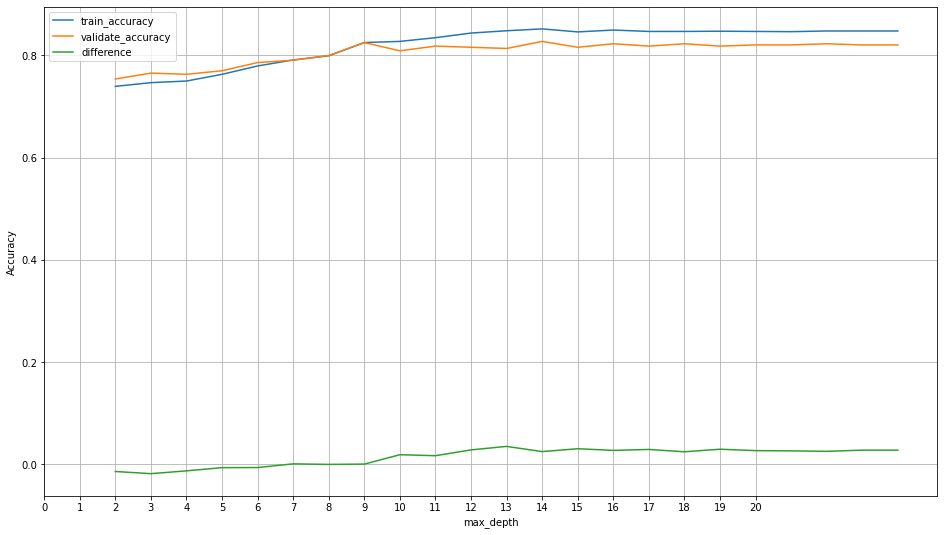

In [73]:
df_rf.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

## Increasing minimum samples per leaf, decreasing max depth


In [78]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest_min_samp = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest_min_samp = forest_min_samp.fit(X_train_new, y_train_new)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest_min_samp.score(X_train_new, y_train_new)
    
    out_of_sample_accuracy = forest_min_samp.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df_min_samp = pd.DataFrame(metrics)
df_min_samp["difference"] = df_min_samp.train_accuracy - df_min_samp.validate_accuracy
df_min_samp.sort_values(by = "validate_accuracy",ascending=False)


,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.956565,0.813793,0.142772
1,3,17,0.911155,0.788506,0.122649
3,5,15,0.865745,0.774713,0.091033
2,4,16,0.883514,0.772414,0.111101
4,6,14,0.855874,0.772414,0.083460
7,9,11,0.824284,0.772414,0.051871
8,10,10,0.824284,0.772414,0.051871
12,14,6,0.804541,0.772414,0.032127
5,7,13,0.838105,0.770115,0.067990
11,13,7,0.810464,0.770115,0.040349


#### takeaways
Increasing minimum samples per leaf, decreasing max depth

best model in this  has 7 min samples per leaf and has 84% train accuracy and 77% validate accuracy

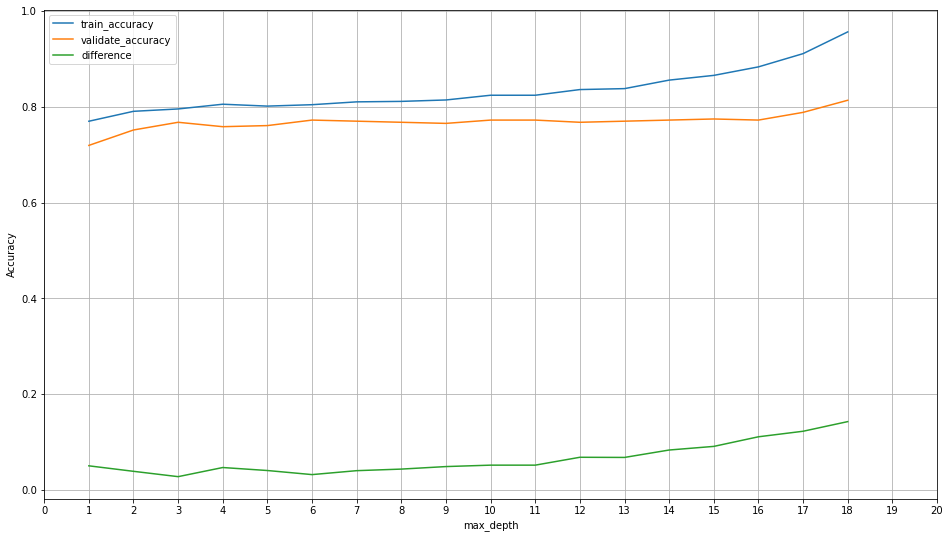

In [76]:
df_min_samp.set_index('max_depth')[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

## Increase both minimum samples per leaf and max depth


In [ ]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest_increase_both  = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest_increase_both = forest_increase_both.fit(X_train_new, y_train_new)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest_increase_both.score(X_train_new, y_train_new)
    
    out_of_sample_accuracy = forest_increase_both.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df_ib = pd.DataFrame(metrics)
df_ib["difference"] = df_ib.train_accuracy - df_ib.validate_accuracy

df_ib.sort_values(by = "validate_accuracy",ascending=False).head(3)


#### takeaways
Increase both minimum samples per leaf and max depth

best model in this has 9 min samples per leaf and has 85% train accuracy and 77% validate accuracy

In [ ]:
df_ib[['train_accuracy', 'validate_accuracy','difference']].plot()
plt.grid()

## Fixed depth and increasing min samples leaf


In [ ]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []


for i in range(2, 50):
    # Make the model
    depth = 5
    n_samples = i
    forest_fd = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest_fd = forest_fd.fit(X_train_new, y_train_new)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest_fd.score(X_train_new, y_train_new)
    
    out_of_sample_accuracy = forest_fd.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df_fd = pd.DataFrame(metrics)
df_fd["difference"] = df_fd.train_accuracy - df_fd.validate_accuracy
df_fd.sort_values(by = "validate_accuracy",ascending=False).head(3)

#### Takeaways
Fixed depth and increasing min samples leaf

best model in this has min samples per leaf and has 85% train accuracy and 77% validate accuracy

In [ ]:
df_fd.set_index('min_samples_per_leaf')[['train_accuracy', 'validate_accuracy', 'difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,50,5))
plt.grid()

### KNN MODEL

In [ ]:
new_train.info()

#### Categories neccessary for KNN model
I chose to go with the top 5 according to the p values

In [ ]:
p_value_df.sort_values(by = "p_values").head()

In [ ]:
x_cols = ["monthly_charges","tenure","internet_service_type_Fiber_optic", "internet_service_type_Fiber_optic","contract_type_Two_year","payment_type_Electronic_check"]
y_col = "churn_Yes"

In [ ]:
X_train_knn, y_train_knn = new_train[x_cols], new_train[y_col]
X_validate_knn, y_validate_knn = validate[x_cols], validate[y_col]
X_test_knn, y_test_knn = test[x_cols], test[y_col]

In [ ]:
knn10 = KNeighborsClassifier(10)
knn10.fit(X_train_knn, y_train_knn)  
# CLASSIFICATION METRICS
y_pred_knn = knn10.predict(X_train_knn)

In [ ]:
print(classification_report(y_train_knn, y_pred_knn))

In [ ]:
report = classification_report(y_train_knn, y_pred_knn, output_dict=True)
print("n_neighbour = 10")
pd.DataFrame(report)

In [ ]:
pd.crosstab(y_train_knn, y_pred_knn)


### takeaways
after trying out a few models, the accuracy on the KNN models were lower and less efficient than the decision trees

Conclusion
A number of factors are contributing to churn. We can attempt to reduce churn by doing the following:

Marketing to younger families with dependents and partners.
Promoting online security and online backup to our internet customers.
Promoting tech support and device protection.
Discouraging the use of electronic checks for payment purposes.
With additional time dedicated to this project:

Investigate fiber optic customers in greater detail and look at possible combinations of factors that might be driving churn within that group.
Investigate our pricing structure across various services to identify if our pricing strategy may be suboptimal.
Improve the readibility of the report via additional comments, markdown cells, and summary tables.
Include a meaningful readme for github containing project description with goals, a data dictionary, project planning, an explanation of how someone else can recreate this project and findings, and key takeaways from this project.
Include a data dictionary.
Increase the number of models to test, especially focusing on hyperparameters and feature engineering to improve model performance.
Included in the github repository is a CSV that contains a prediction for every customer, except for customers with 0 tenure. Those customers have 0% chance to be predicted to have churned.